# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>
<a href="https://www.hackerrank.com/kggold4?hr_r=1"><img src="images/hackerrank.png" width="25px" height="25px" align="left"></a>
<a href="https://stackoverflow.com/users/14749277/kfir-goldfarb"><img src="images/stackoverflow.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 3
<i>Dimensionality Reduction and PCA for Cat & Dog dataset</i>

In [1]:
# Data Science libraries
import pandas as pd
import numpy as np

# Graphical libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import cv2

# Main libraries
import os
import random
import warnings
from zipfile import ZipFile as zf
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# sklearn tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### <i>Helping Functions I Wrote:</i>

In [2]:
# function that print the accuracy of a classification model
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))
    return accuracy

In [3]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

In [4]:
# images size
IMAGE_SIZE = 100

# path of the images of the cats vs dogs data
PATH = "data/task_3/train"

# Creating a dataframe that contains all of our images names with his label (0 - 'cat', 1 - 'dog')
images = os.listdir(PATH)
label = []

for image in images:
    if 'cat' in image:
        label.append(0)
    else:
        label.append(1)
        
dogs_cats = {'image' : images, 'label' : label}
dogs_cats = pd.DataFrame(dogs_cats)

# mixing data
dogs_cats = dogs_cats.sample(frac = 1).reset_index(drop=True)

In [5]:
# show first and last five samples of our data
dogs_cats

,image,label
0,cat.5659.jpg,0
1,cat.1925.jpg,0
2,cat.578.jpg,0
3,dog.1262.jpg,1
4,cat.7783.jpg,0
...,...,...
24995,dog.3039.jpg,1
24996,dog.8288.jpg,1
24997,dog.7898.jpg,1
24998,cat.10777.jpg,0


# 100^2 Pixels with grey scale and PCA of 336 Components:

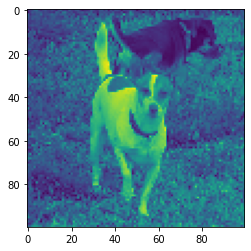

In [6]:
# printing a random image from the data
random_image_name = random.choice(dogs_cats.image)
random_image = cv2.imread(PATH + '/' + str(random_image_name))
random_image = cv2.resize(random_image, (IMAGE_SIZE, IMAGE_SIZE))
random_image = cv2.cvtColor(random_image, cv2.COLOR_RGB2GRAY)
plt.imshow(random_image)

In [7]:
image_data  = []
image_label = []

for i in range(len(dogs_cats)):
    IMAGE_PATH = PATH + '/' + dogs_cats["image"][i]
    image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    # here, we are normalizing the images
    norm_image = image / 255.0 
    # Creating and saving each image in the form of numerical data in an array
    image_data.append(norm_image)
    image_label.append(dogs_cats["label"][i])

X = np.array(image_data)
y = np.array(image_label)

# reshape X from 3D shape to 2D shape
X = X.reshape(-1, IMAGE_SIZE * IMAGE_SIZE)

In [8]:
# split data to 20000 train samples and 5000 to test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# train shape is 20000 on 100^2 pixels
X_train.shape

(20000, 10000)

In [10]:
pca_components = PCA(n_components=0.9)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (20000, 332)
shape of 2 component PCA test data is: (5000, 332)


In [11]:
pca_components.explained_variance_ratio_

array([2.01428193e-01, 1.11558851e-01, 7.61746260e-02, 6.08235957e-02,
       3.13580609e-02, 2.83883650e-02, 2.37486491e-02, 2.03949745e-02,
       1.82333193e-02, 1.47713465e-02, 1.32344565e-02, 1.22279226e-02,
       1.05157085e-02, 8.93181996e-03, 8.20906550e-03, 7.95387135e-03,
       7.28952236e-03, 7.16236650e-03, 6.68976070e-03, 6.11990068e-03,
       5.33243006e-03, 5.17253490e-03, 4.89812240e-03, 4.64130027e-03,
       4.57024547e-03, 4.03695808e-03, 4.01054201e-03, 3.88556199e-03,
       3.65726657e-03, 3.47932691e-03, 3.46037480e-03, 3.36743163e-03,
       3.28864533e-03, 3.04466867e-03, 2.85335193e-03, 2.77995462e-03,
       2.76624996e-03, 2.66444920e-03, 2.48130564e-03, 2.39902167e-03,
       2.34981246e-03, 2.29307188e-03, 2.28087191e-03, 2.23074299e-03,
       2.10898182e-03, 2.07826067e-03, 2.00854016e-03, 1.97896607e-03,
       1.90359923e-03, 1.83833311e-03, 1.80587994e-03, 1.76385833e-03,
       1.73597605e-03, 1.67804361e-03, 1.64746572e-03, 1.63362625e-03,
      

### Bagging Classifier:

In [12]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

# print accuracy
bagging_clf_auc = print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 55.24 %


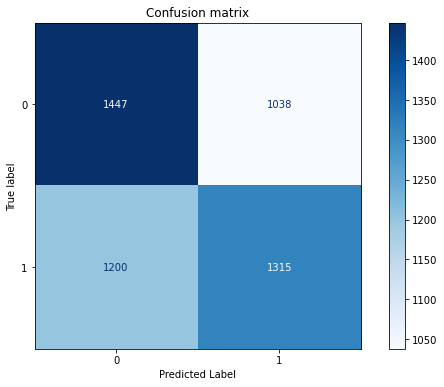

In [13]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [14]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1)

# print accuracy
pasting_clf_auc = print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 55.28 %


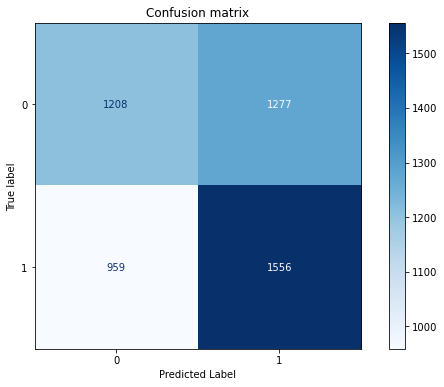

In [15]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [16]:
rnd_clf = RandomForestClassifier(
    n_estimators=200,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
rnd_clf_auc = print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 59.62 %


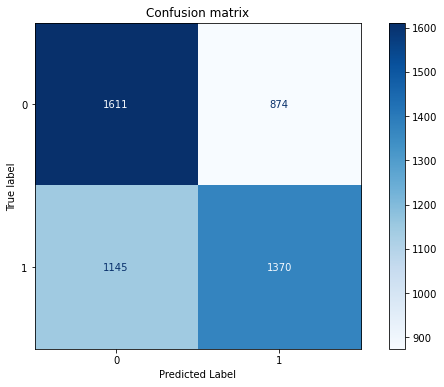

In [17]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [18]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.1) # 0.5 was 55.84 %

# print accuracy
adaboost_clf_auc = print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 57.94 %


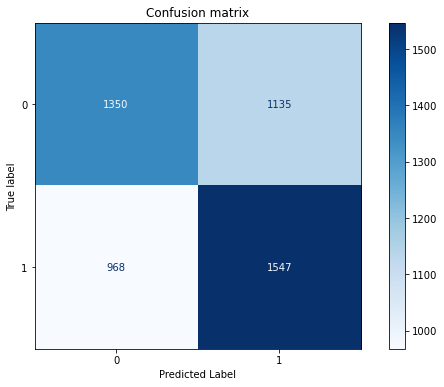

In [19]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [20]:
bin_xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
bin_xgb_model_auc = print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 63.72 %


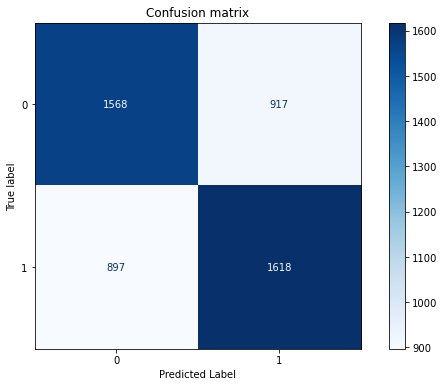

In [21]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [22]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_rnd_clf.fit(X_transformed_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))
gs_rnd_clf_auc = gs_rnd_clf.best_score_

{'max_features': 20, 'n_estimators': 200}
accuracy of the model is: 61.59 %


### Grid Seach with Extreme Gradient Boostring Classifier:

In [ ]:
mul_xgb_model= xgb.XGBClassifier(
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1,
    n_jobs=-1)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20], 'max_depth' : [2,8,16]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_mul_xgb_model.fit(X_transformed_train, y_train)

In [ ]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))
gs_mul_xgb_model_auc = gs_mul_xgb_model.best_score_

In [ ]:
classifiers_accuracy = {
    'Bagging Classifier' : bagging_clf_auc,
    'Pasting Classifier' : pasting_clf_auc,
    'Random Forest Classifier': rnd_clf_auc,
    'AdaBoostring Classifier' : adaboost_clf_auc,
    'Grid Search with Random Forest Classifier' : gs_rnd_clf_auc,
    'Grid Seach with Extreme Gradient Boostring Classifier(Multi)' : gs_mul_xgb_model_auc
}

# <i>Conclusions of best model in 100^2 pixels (greysacle) and PCA of 336 Components</i>

In [ ]:
max_accuracy_classifier = max(classifiers_accuracy, key=classifiers_accuracy.get)
print("\nThe classifier with the maximum accuracy in 100^2 pixels images (greysacle) and 336-PCA Components is: {}, with the accuracy of: {} %".format(max_accuracy_classifier, "%.2f" % (100 * classifiers_accuracy[max_accuracy_classifier])))

# 30^2 Pixels with no grey scale and PCA of _ Components:

In [ ]:
# images size
IMAGE_SIZE = 30

In [ ]:
image_data  = []
image_label = []

for i in range(len(dogs_cats)):
    IMAGE_PATH = PATH + '/' + dogs_cats["image"][i]
    image = cv2.imread(IMAGE_PATH) 
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    # here, we are normalizing the images
    norm_image = image / 255.0 
    # Creating and saving each image in the form of numerical data in an array
    image_data.append(norm_image)
    image_label.append(dogs_cats["label"][i])

X = np.array(image_data)
y = np.array(image_label)

# reshape X from 3D shape to 2D shape
X = X.reshape(-1, IMAGE_SIZE * IMAGE_SIZE)

In [ ]:
# split data to 20000 train samples and 5000 to test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# train shape is 20000 on 30^2 pixels
X_train.shape

In [ ]:
# printing a random image from the data
random_image_name = random.choice(dogs_cats.image)
random_image = cv2.imread(PATH + '/' + str(random_image_name))
random_image = cv2.resize(random_image, (IMAGE_SIZE, IMAGE_SIZE))
random_image = cv2.cvtColor(random_image, cv2.COLOR_RGB2GRAY)
plt.imshow(random_image)

In [ ]:
pca_components = PCA(n_components=0.9)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

In [ ]:
pca_components.explained_variance_ratio_

### Bagging Classifier:

In [ ]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

# print accuracy
bagging_clf_auc = print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

### Pating Classifier:

In [ ]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=200,
    max_samples=100,
    bootstrap=False,
    n_jobs=-1)

# print accuracy
pasting_clf_auc = print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

### Random Forest Classifier:

In [ ]:
rnd_clf = RandomForestClassifier(
    n_estimators=200,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
rnd_clf_auc = print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

### AdaBoost Classifier:

In [ ]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=16),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.1) # 0.5 was 55.84 %

# print accuracy
adaboost_clf_auc = print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

### Extreme Gradient Boostring Classifier(Binary):

In [ ]:
bin_xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    use_label_encoder=False,
    objective="binary:logistic",
    eval_metric="auc",
    verbosity=1,
    n_jobs=-1)

# print accuracy
bin_xgb_model_auc = print_accuracy(bin_xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bin_xgb_model, X_transformed_test, y_test)

### Grid Search with Random Forest Classifier

In [ ]:
rnd_clf = RandomForestClassifier().fit(X_transformed_train, y_train)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20]}
gs_rnd_clf = GridSearchCV(rnd_clf, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_rnd_clf.fit(X_transformed_train, y_train)

In [ ]:
print(gs_rnd_clf.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_rnd_clf.best_score_ * 100)))
gs_rnd_clf_auc = gs_rnd_clf.best_score_

### Grid Seach with Extreme Gradient Boostring Classifier:

In [ ]:
mul_xgb_model= xgb.XGBClassifier(
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1,
    n_jobs=-1)

param_values = {'n_estimators' : [50,100,200], 'max_features' : [5,10,20], 'max_depth' : [2,8,16]}
gs_mul_xgb_model = GridSearchCV(mul_xgb_model, param_grid=param_values, cv=5, scoring='accuracy', n_jobs=-1)

gs_mul_xgb_model.fit(X_transformed_train, y_train)

In [ ]:
print(gs_mul_xgb_model.best_params_)
print('accuracy of the model is: {} %'.format("%.2f" % (gs_mul_xgb_model.best_score_ * 100)))
gs_mul_xgb_model_auc = gs_mul_xgb_model.best_score_